In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
import numpy as np
import pandas as pd

# Load the reference and deformed images
reference_image_path = "/content/drive/MyDrive/Nanatom/Digital Image Correlation/reference_image_1.jpg"
deformed_image_path = "/content/drive/MyDrive/Nanatom/Digital Image Correlation/deformed_image_2.jpg"

reference_image = cv2.imread(reference_image_path)
deformed_image = cv2.imread(deformed_image_path)

# Ensure both images are loaded properly
if reference_image is None:
    print("Error: Could not load reference image.")
    exit()
if deformed_image is None:
    print("Error: Could not load deformed image.")
    exit()

# Convert images to grayscale
reference_gray = cv2.cvtColor(reference_image, cv2.COLOR_BGR2GRAY)
deformed_gray = cv2.cvtColor(deformed_image, cv2.COLOR_BGR2GRAY)

# Initialize the ORB detector
orb = cv2.ORB_create()

# Detect keypoints and descriptors in both images
keypoints_ref, descriptors_ref = orb.detectAndCompute(reference_gray, None)
keypoints_def, descriptors_def = orb.detectAndCompute(deformed_gray, None)

# Use BFMatcher to find matches between descriptors
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(descriptors_ref, descriptors_def)

# Sort matches based on distance (best matches first)
matches = sorted(matches, key=lambda x: x.distance)

# Initialize lists to store data
matched_ref_pts = []
matched_def_pts = []
differences = []
strains = []

# Extract matched keypoints and compute differences and strains
for match in matches:
    # Get the coordinates of the matched keypoints in both images
    ref_idx = match.queryIdx
    def_idx = match.trainIdx

    ref_pt = np.array(keypoints_ref[ref_idx].pt)
    def_pt = np.array(keypoints_def[def_idx].pt)

    # Calculate the Euclidean distance (original length) in the reference image
    original_length = np.linalg.norm(ref_pt)

    # Calculate the displacement (difference) between the matched points
    displacement = np.linalg.norm(def_pt - ref_pt)

    # Calculate strain (relative change in distance)
    strain = displacement / original_length if original_length != 0 else np.nan  # Avoid division by zero

    matched_ref_pts.append(ref_pt)
    matched_def_pts.append(def_pt)
    differences.append(displacement)
    strains.append(strain)

# Convert the lists to a pandas DataFrame
data = {'reference_points': matched_ref_pts, 'deformed_points': matched_def_pts, 'difference': differences, 'strain': strains}
df = pd.DataFrame(data)

# Output the data to a CSV file
output_excel_path = "/content/drive/MyDrive/Nanatom/Digital Image Correlation/dic_trail_data.csv"
df.to_csv(output_excel_path, index=False)

print(f"Data successfully written to {output_excel_path}")

# Draw the matches for visualization
matched_image = cv2.drawMatches(reference_image, keypoints_ref, deformed_image, keypoints_def, matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Display the matches
# cv2.imshow('Matches', matched_image)
cv2.waitKey(0)
cv2.destroyAllWindows()



Data successfully written to /content/drive/MyDrive/Nanatom/Digital Image Correlation/dic_trail_data.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("/content/drive/MyDrive/Digital Image Correlation/dic_trail_data.csv")


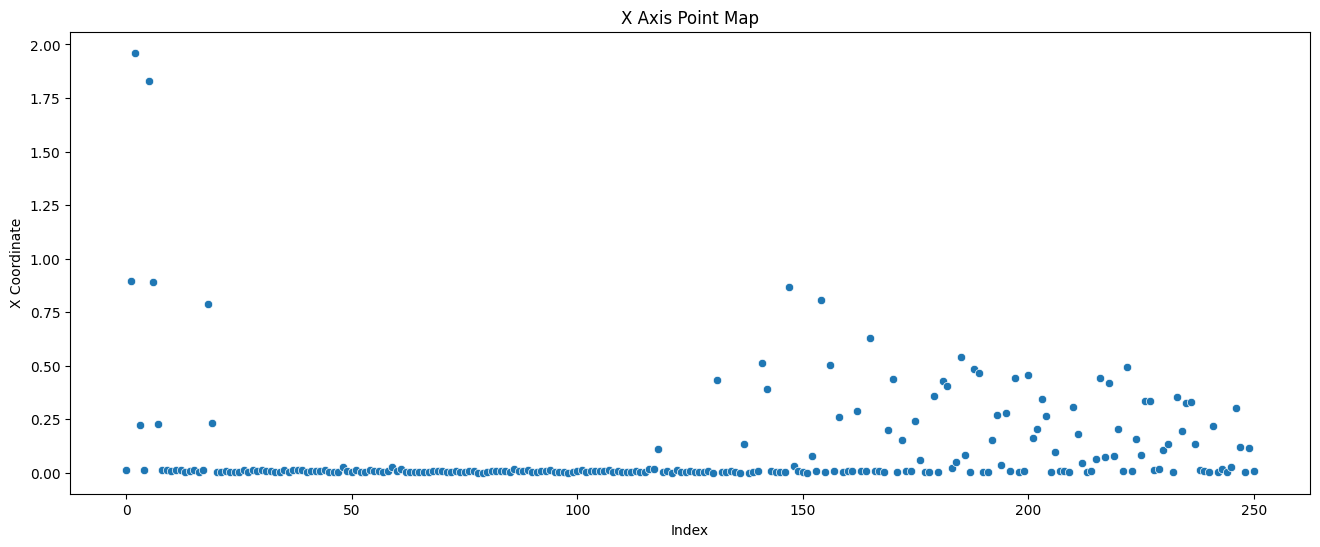

In [ ]:

import matplotlib.pyplot as plt
plt.figure(figsize=(16, 6))
sns.scatterplot(x=df.index, y=df['strain'], data=df)
plt.title('X Axis Point Map')
plt.xlabel('Index')
plt.ylabel('X Coordinate')
plt.show()


In [ ]:

# Calculate the IQR
Q1 = df['strain'].quantile(0.25)
Q3 = df['strain'].quantile(0.75)
print(Q1, Q3)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df_filtered = df[(df['strain'] >= lower_bound) & (df['strain'] <= upper_bound)]

# Calculate the average value
average_value = df_filtered['strain'].mean()

print("Average value after removing outliers:", average_value)


0.0044647083788343 0.07651468095169325
Average value after removing outliers: 0.018050735509597328


Test

In [ ]:
import cv2
import numpy as np
import pandas as pd

# Define the image paths
reference_image_path = '/content/drive/MyDrive/Nanatom/Digital Image Correlation/reference_image_1.jpg'
deformed_image_path = '/content/drive/MyDrive/Nanatom/Digital Image Correlation/deformed_image_2.jpg'

# Load images
reference_image = cv2.imread(reference_image_path)
deformed_image = cv2.imread(deformed_image_path)

# Ensure both images are loaded properly
if reference_image is None:
    print("Error: Could not load reference image.")
    exit()
if deformed_image is None:
    print("Error: Could not load deformed image.")
    exit()

# Convert images to grayscale
reference_gray = cv2.cvtColor(reference_image, cv2.COLOR_BGR2GRAY)
deformed_gray = cv2.cvtColor(deformed_image, cv2.COLOR_BGR2GRAY)

# Initialize the ORB detector
orb = cv2.ORB_create()

# Detect keypoints and descriptors in both images
keypoints_ref, descriptors_ref = orb.detectAndCompute(reference_gray, None)
keypoints_def, descriptors_def = orb.detectAndCompute(deformed_gray, None)

# Use BFMatcher to find matches between descriptors
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(descriptors_ref, descriptors_def)

# Sort matches based on distance (best matches first)
matches = sorted(matches, key=lambda x: x.distance)

# Initialize lists to store data
matched_ref_pts = []
matched_def_pts = []

# Extract matched keypoints
for match in matches:
    # Get the coordinates of the matched keypoints in both images
    ref_idx = match.queryIdx
    def_idx = match.trainIdx

    ref_pt = keypoints_ref[ref_idx].pt
    def_pt = keypoints_def[def_idx].pt

    matched_ref_pts.append(ref_pt)
    matched_def_pts.append(def_pt)

# Convert lists to numpy arrays for easier manipulation
matched_ref_pts = np.array(matched_ref_pts)
matched_def_pts = np.array(matched_def_pts)

# Extract x and y coordinates separately
ref_x_coords = matched_ref_pts[:, 0]
ref_y_coords = matched_ref_pts[:, 1]
def_x_coords = matched_def_pts[:, 0]
def_y_coords = matched_def_pts[:, 1]

# Prepare data for DataFrame
data = {
    'Ref_X': ref_x_coords,
    'Ref_Y': ref_y_coords,
    'Def_X': def_x_coords,
    'Def_Y': def_y_coords
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Output the data to a CSV file
output_csv_path = "/content/drive/MyDrive/Nanatom/Digital Image Correlation/dic_trail_data.csv"
df.to_csv(output_csv_path, index=False)

print(f"Data successfully written to {output_csv_path}")


Data successfully written to /content/drive/MyDrive/Nanatom/Digital Image Correlation/dic_trail_data.csv


In [ ]:
distances=[]
for i in range(len(df)):
  distance=np.sqrt((df['Ref_X']-df['Def_X'])**2+(df['Ref_Y']-df['Def_Y'])**2)
  df['distance']=distance

Q1 = df['distance'].quantile(0)
Q3 = df['distance'].quantile(0.75)
print(Q1, Q3)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df_filtered = df[(df['distance'] >= Q1) & (df['distance'] <= Q3)]

# Calculate the average value
average_value = df_filtered['distance'].mean()

print("Average value after removing outliers:", average_value)
df_filtered.head(15)

0.0 47.531396384191595
Average value after removing outliers: 5.59894660965433


,Ref_X,Ref_Y,Def_X,Def_Y,distance
0,888.629089,125.411362,899.378662,125.411362,10.749573
4,435.600006,226.800003,429.600006,226.800003,6.000000
8,442.800018,220.800003,436.800018,220.800003,6.000000
9,818.159851,292.626526,830.103760,292.626526,11.943909
10,742.000000,293.000000,748.000000,293.000000,6.000000
11,794.880005,230.400009,803.520020,230.400009,8.640015
12,831.298218,193.491821,842.047729,193.491821,10.749512
13,626.000000,269.000000,628.000000,269.000000,2.000000
14,767.520020,207.360016,774.720032,207.360016,7.200012
15,414.720032,254.016022,407.808044,254.016022,6.911987


In [ ]:
import random
if len(matches) >= 2:
    # Randomly select two indices from the matches list
    random_indices = random.sample(range(len(df_filtered)), 2)
    ref_idx_1, ref_idx_2 = random_indices
    def_idx_1, def_idx_2 = random_indices

    # Get the coordinates of the selected points
    random_ref_pt_1 = matched_ref_pts[ref_idx_1]
    random_ref_pt_2 = matched_ref_pts[ref_idx_2]
    random_def_pt_1 = matched_def_pts[ref_idx_1]
    random_def_pt_2 = matched_def_pts[def_idx_2]

print("Randomly selected points:")
print(f"Ref Point 1: {random_ref_pt_1}, Def Point 1: {random_def_pt_1}")
print(f"Ref Point 2: {random_ref_pt_2}, Def Point 2: {random_def_pt_2}")

Randomly selected points:
Ref Point 1: [520.059021   283.66854858], Def Point 1: [517.57067871 283.66854858]
Ref Point 2: [464. 233.], Def Point 2: [790. 237.]


In [ ]:
df_filtered.loc[:, 'total_distance'] = np.sqrt(
    (df_filtered['Ref_X'] - random_ref_pt_1[0]) ** 2
)

df_filtered.loc[:, 'distance_def'] = np.sqrt(
    (df_filtered['Def_X'] - random_def_pt_1[0]) ** 2
)

df_filtered.loc[:, 'displacement'] = abs( df_filtered['distance_def'] - df_filtered['total_distance'])
df_filtered.loc[:, 'strain'] = df_filtered['displacement'] / df_filtered['total_distance']
print(df_filtered.head(15))


         Ref_X       Ref_Y       Def_X       Def_Y   distance  total_distance  \
0   888.629089  125.411362  899.378662  125.411362  10.749573      368.570068   
4   435.600006  226.800003  429.600006  226.800003   6.000000       84.459015   
8   442.800018  220.800003  436.800018  220.800003   6.000000       77.259003   
9   818.159851  292.626526  830.103760  292.626526  11.943909      298.100830   
10  742.000000  293.000000  748.000000  293.000000   6.000000      221.940979   
11  794.880005  230.400009  803.520020  230.400009   8.640015      274.820984   
12  831.298218  193.491821  842.047729  193.491821  10.749512      311.239197   
13  626.000000  269.000000  628.000000  269.000000   2.000000      105.940979   
14  767.520020  207.360016  774.720032  207.360016   7.200012      247.460999   
15  414.720032  254.016022  407.808044  254.016022   6.911987      105.338989   
16  549.504028  292.032013  547.776062  292.032013   1.727966       29.445007   
17  420.940857  219.801636  

In [ ]:
Q1 = df_filtered['strain'].quantile(0.25)
Q3 = df_filtered['strain'].quantile(0.75)
print(Q1, Q3)
df_strain=df_filtered[(df_filtered['strain'] >= Q1) & (df_filtered['strain'] <= Q3)]
avg=df_strain['strain'].mean()
print("average strain is : ",avg)


0.0350867235623933 0.049890922723603924
average strain is :  0.04093516278361828


In [ ]:
df_filtered.loc[:, 'total_distance'] = np.sqrt(
    (df_filtered['Ref_X'] - random_ref_pt_2[0]) ** 2
)

df_filtered.loc[:, 'distance_def'] = np.sqrt(
    (df_filtered['Def_X'] - random_def_pt_2[0]) ** 2
)

df_filtered.loc[:, 'displacement'] = abs(df_filtered['total_distance'] - df_filtered['distance_def'])
df_filtered.loc[:, 'strain'] = df_filtered['displacement'] / df_filtered['total_distance']
print(df_filtered.head(15))


         Ref_X       Ref_Y       Def_X       Def_Y   distance  total_distance  \
0   888.629089  125.411362  899.378662  125.411362  10.749573      424.629089   
4   435.600006  226.800003  429.600006  226.800003   6.000000       28.399994   
8   442.800018  220.800003  436.800018  220.800003   6.000000       21.199982   
9   818.159851  292.626526  830.103760  292.626526  11.943909      354.159851   
10  742.000000  293.000000  748.000000  293.000000   6.000000      278.000000   
11  794.880005  230.400009  803.520020  230.400009   8.640015      330.880005   
12  831.298218  193.491821  842.047729  193.491821  10.749512      367.298218   
13  626.000000  269.000000  628.000000  269.000000   2.000000      162.000000   
14  767.520020  207.360016  774.720032  207.360016   7.200012      303.520020   
15  414.720032  254.016022  407.808044  254.016022   6.911987       49.279968   
16  549.504028  292.032013  547.776062  292.032013   1.727966       85.504028   
17  420.940857  219.801636  

In [ ]:
Q1 = df_filtered['strain'].quantile(0.25)
Q3 = df_filtered['strain'].quantile(0.75)
print(Q1, Q3)
df_strain=df_filtered[(df_filtered['strain'] >= Q1) & (df_filtered['strain'] <= Q3)]
avg=df_strain['strain'].mean()
print(avg)


0.5351812255108466 4.3758265655451885
1.3592024836079952


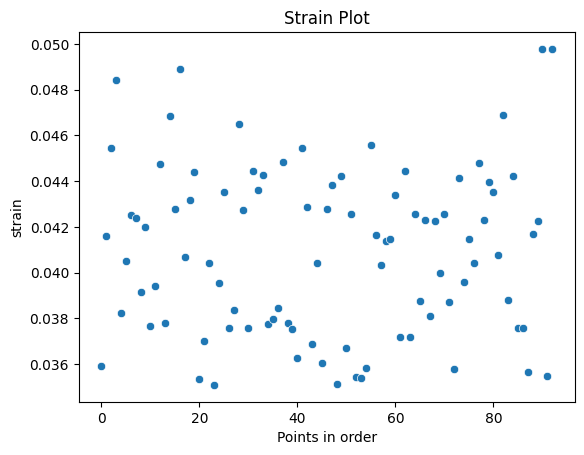

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
strain=df_strain['strain']
sns.scatterplot(strain.values)
plt.title("Strain Plot")
plt.xlabel("Points in order")
plt.ylabel("strain")
plt.show()

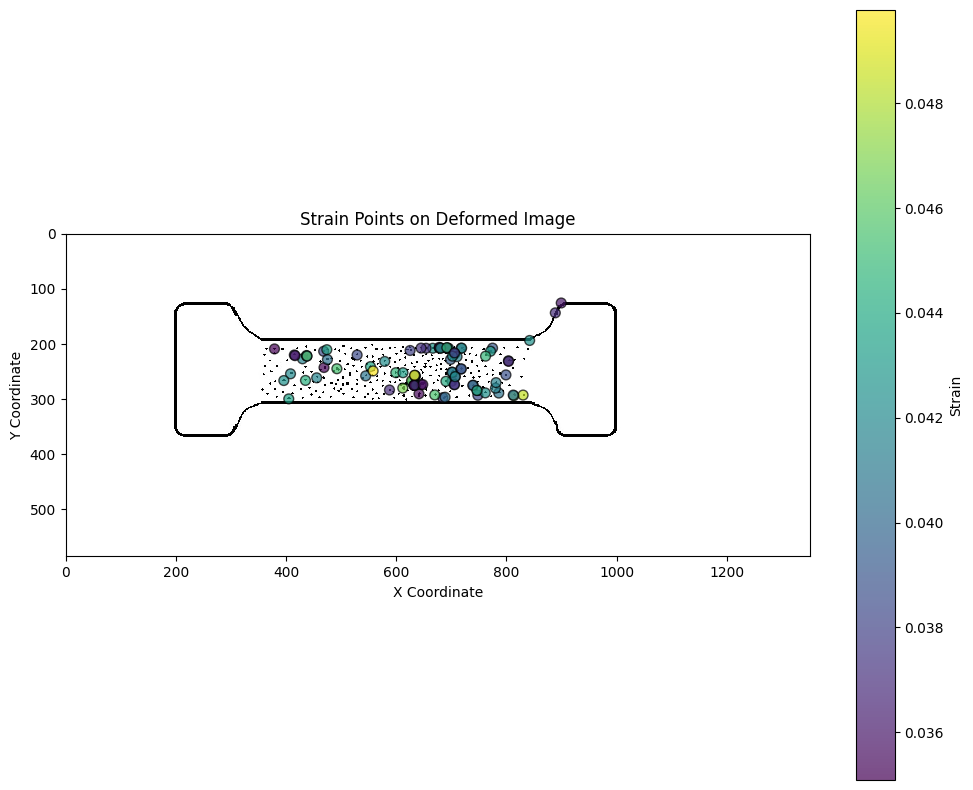

In [ ]:
from scipy.interpolate import griddata
import matplotlib.pyplot as plt
import seaborn as sns
x = df_strain['Def_X']
y = df_strain['Def_Y']
values = df_strain['strain']
plt.figure(figsize=(12, 10))
deformed_image_rgb = cv2.cvtColor(deformed_image, cv2.COLOR_BGR2RGB)
plt.imshow(deformed_image_rgb, interpolation='none')
scatter = plt.scatter(x, y, c=values, cmap='viridis', edgecolor='k', s=50, alpha=0.7)

# Add colorbar
plt.colorbar(scatter, label='Strain')

# Set titles and labels
plt.title('Strain Points on Deformed Image')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')

plt.show()

Festure Selection using SIFT


In [ ]:
!pip install opencv-contrib-python


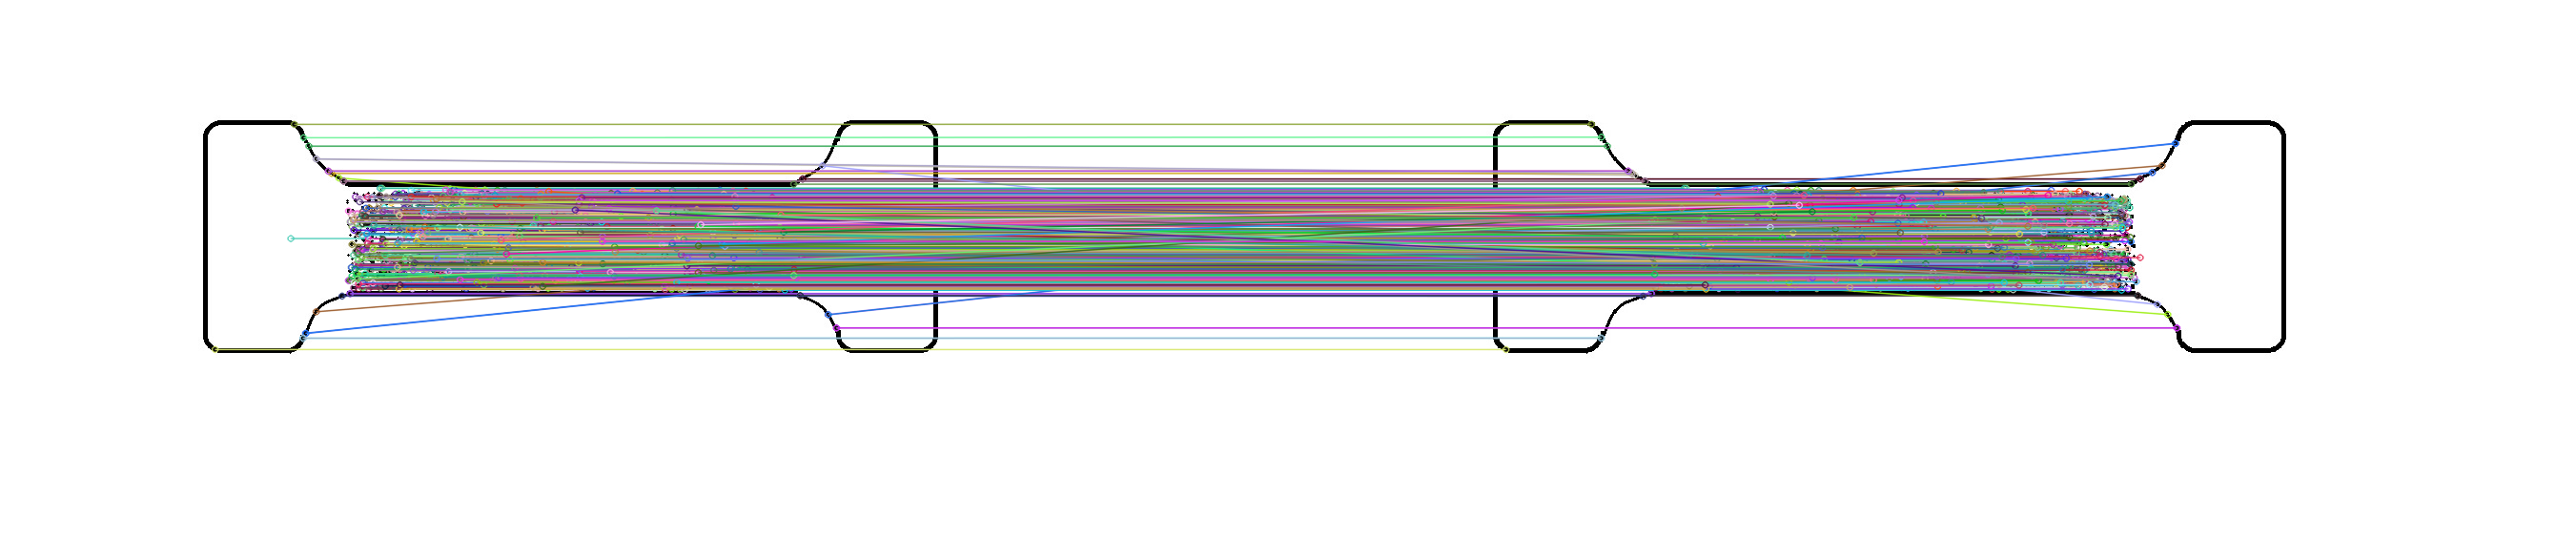

Data successfully written to /content/drive/MyDrive/Nanatom/Digital Image Correlation/dic_trail_data.csv


In [2]:
import cv2
import numpy as np
import pandas as pd
from google.colab.patches import cv2_imshow
# Define the image paths
reference_image_path = '/content/drive/MyDrive/Nanatom/Digital Image Correlation/reference_image_2.0.jpg'
deformed_image_path = '/content/drive/MyDrive/Nanatom/Digital Image Correlation/deformed_image_2.0.jpg'

# Load images
reference_image = cv2.imread(reference_image_path)
deformed_image = cv2.imread(deformed_image_path)

# Ensure both images are loaded properly
if reference_image is None:
    print("Error: Could not load reference image.")
    exit()
if deformed_image is None:
    print("Error: Could not load deformed image.")
    exit()

# Convert images to grayscale
reference_gray = cv2.cvtColor(reference_image, cv2.COLOR_BGR2GRAY)
deformed_gray = cv2.cvtColor(deformed_image, cv2.COLOR_BGR2GRAY)

# Initialize the SIFT detector
sift = cv2.SIFT_create()

# Detect keypoints and descriptors in both images
keypoints_ref, descriptors_ref = sift.detectAndCompute(reference_gray, None)
keypoints_def, descriptors_def = sift.detectAndCompute(deformed_gray, None)

# Use BFMatcher to find matches between descriptors
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
matches = bf.match(descriptors_ref, descriptors_def)

# Sort matches based on distance (best matches first)
matches = sorted(matches, key=lambda x: x.distance)

# Initialize lists to store data
matched_ref_pts = []
matched_def_pts = []

# Extract matched keypoints
for match in matches:
    # Get the coordinates of the matched keypoints in both images
    ref_idx = match.queryIdx
    def_idx = match.trainIdx

    ref_pt = keypoints_ref[ref_idx].pt
    def_pt = keypoints_def[def_idx].pt

    matched_ref_pts.append(ref_pt)
    matched_def_pts.append(def_pt)

# Convert lists to numpy arrays for easier manipulation
matched_ref_pts = np.array(matched_ref_pts)
matched_def_pts = np.array(matched_def_pts)
matched_image = cv2.drawMatches(reference_image, keypoints_ref, deformed_image, keypoints_def, matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

cv2_imshow(matched_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Extract x and y coordinates separately
ref_x_coords = matched_ref_pts[:, 0]
ref_y_coords = matched_ref_pts[:, 1]
def_x_coords = matched_def_pts[:, 0]
def_y_coords = matched_def_pts[:, 1]

# Prepare data for DataFrame
data = {
    'Ref_X': ref_x_coords,
    'Ref_Y': ref_y_coords,
    'Def_X': def_x_coords,
    'Def_Y': def_y_coords
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Output the data to a CSV file
output_csv_path = "/content/drive/MyDrive/Nanatom/Digital Image Correlation/dic_trail_data.csv"
df.to_csv(output_csv_path, index=False)

print(f"Data successfully written to {output_csv_path}")


In [3]:
distances=[]
for i in range(len(df)):
  distance=np.sqrt((df['Ref_X']-df['Def_X'])**2+(df['Ref_Y']-df['Def_Y'])**2)
  df['distance']=distance

Q1 = df['distance'].quantile(0)
Q3 = df['distance'].quantile(0.99)
print(Q1, Q3)

# Filter out outliers
df_filtered = df[(df['distance'] >= Q1) & (df['distance'] <= Q3)]

# Calculate the average value
average_value = df_filtered['distance'].mean()

print("Average value after removing outliers:", average_value)
df_filtered.count()

3.1031206499998545 208.5786010061865
Average value after removing outliers: 34.15677063960308


,0
Ref_X,1646
Ref_Y,1646
Def_X,1646
Def_Y,1646
distance,1646


In [4]:
import random
if len(matches) >= 2:
    # Randomly select two indices from the matches list
    random_indices = random.sample(range(len(df_filtered)), 2)
    ref_idx_1, ref_idx_2 = random_indices
    def_idx_1, def_idx_2 = random_indices

    # Get the coordinates of the selected points
    random_ref_pt_1 = matched_ref_pts[ref_idx_1]
    random_ref_pt_2 = matched_ref_pts[ref_idx_2]
    random_def_pt_1 = matched_def_pts[ref_idx_1]
    random_def_pt_2 = matched_def_pts[def_idx_2]

print("Randomly selected points:")
print(f"Ref Point 1: {random_ref_pt_1}, Def Point 1: {random_def_pt_1}")
print(f"Ref Point 2: {random_ref_pt_2}, Def Point 2: {random_def_pt_2}")

Randomly selected points:
Ref Point 1: [633.49530029 221.46511841], Def Point 1: [668.95227051 221.54205322]
Ref Point 2: [684.91308594 278.65533447], Def Point 2: [724.86859131 278.65454102]


In [5]:
df_filtered.loc[:, 'total_distance'] = abs(
    (df_filtered['Ref_X'] - random_ref_pt_1[0])
)

df_filtered.loc[:, 'distance_def'] = abs(
    (df_filtered['Def_X'] - random_def_pt_1[0])
)

df_filtered.loc[:, 'displacement'] = abs( df_filtered['distance_def'] - df_filtered['total_distance'])
df_filtered.loc[:, 'strain'] = df_filtered['displacement'] / df_filtered['total_distance']
print(df_filtered.head(15))

         Ref_X       Ref_Y       Def_X       Def_Y   distance  total_distance  \
0   412.462616  278.550415  430.458862  278.544586  17.996247      221.032684   
1   412.310028  283.284027  430.302002  283.276550  17.991975      221.185272   
2   413.550201  222.405426  431.530945  222.418396  17.980748      219.945099   
3   412.462616  278.550415  430.458862  278.544586  17.996247      221.032684   
4   400.257660  196.822647  417.256470  196.812454  16.998813      233.237640   
5   439.282776  201.199432  459.280914  201.194595  19.998139      194.212524   
6   524.333984  224.562820  551.334839  224.572815  27.000856      109.161316   
7   651.516846  292.242340  688.522583  292.218994  37.005745       18.021545   
8   440.832153  265.809113  460.835571  265.808228  20.003418      192.663147   
9   436.353638  227.055511  456.333374  227.049713  19.979737      197.141663   
10  440.832153  265.809113  460.835571  265.808228  20.003418      192.663147   
11  716.778687  205.128479  

<ipython-input-5-ee5c54cc088f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.loc[:, 'total_distance'] = abs(
<ipython-input-5-ee5c54cc088f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.loc[:, 'distance_def'] = abs(
<ipython-input-5-ee5c54cc088f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

In [6]:
Q1 = df_filtered['strain'].quantile(0.2)
Q3 = df_filtered['strain'].quantile(0.99)
print(Q1, Q3)
df_strain=df_filtered[(df_filtered['strain'] >= Q1) & (df_filtered['strain'] <= Q3)]
avg=df_strain['strain'].mean()
print("average strain is : ",avg)

0.07770324426539632 0.3946395163584919
average strain is :  0.08433307408376407


In [57]:
df_filtered.loc[:, 'total_distance'] = abs(
    (df_filtered['Ref_X'] - random_ref_pt_2[0])
)

df_filtered.loc[:, 'distance_def'] = abs(
    (df_filtered['Def_X'] - random_def_pt_2[0])
)

df_filtered.loc[:, 'displacement'] = abs(df_filtered['total_distance'] - df_filtered['distance_def'])
df_filtered.loc[:, 'strain'] = df_filtered['displacement'] / df_filtered['total_distance']
print(df_filtered.head(15))


         Ref_X       Ref_Y       Def_X       Def_Y  distance  total_distance  \
0   563.865845  301.800079  563.869446  301.797546  0.004403        6.795776   
1   375.728516  302.296844  375.726379  302.299683  0.003552      194.933105   
2   624.198364  262.371643  624.189087  262.375244  0.009952       53.536743   
3   343.923340  178.849060  343.933899  178.853745  0.011552      226.738281   
4   358.339630  309.900726  358.334686  309.902679  0.005316      212.321991   
5   379.776825  272.745209  379.776184  272.744049  0.001325      190.884796   
6   384.523682  296.773132  384.526062  296.771393  0.002948      186.137939   
7   394.820099  198.333252  394.821289  198.329178  0.004244      175.841522   
8   500.938812  301.090729  500.932556  301.094208  0.007158       69.722809   
9   602.138123  200.606750  602.156799  200.599045  0.020204       31.476501   
10  609.129089  301.099182  609.117859  301.102417  0.011687       38.467468   
11  652.274780  261.077576  652.276794  

In [ ]:
Q1 = df_filtered['strain'].quantile(0.25)
Q3 = df_filtered['strain'].quantile(0.75)
print(Q1, Q3)
df_strain=df_filtered[(df_filtered['strain'] >= Q1) & (df_filtered['strain'] <= Q3)]
avg=df_strain['strain'].mean()
print(avg)

0.041121487598443765 0.046115477712203215
0.043432297644987294


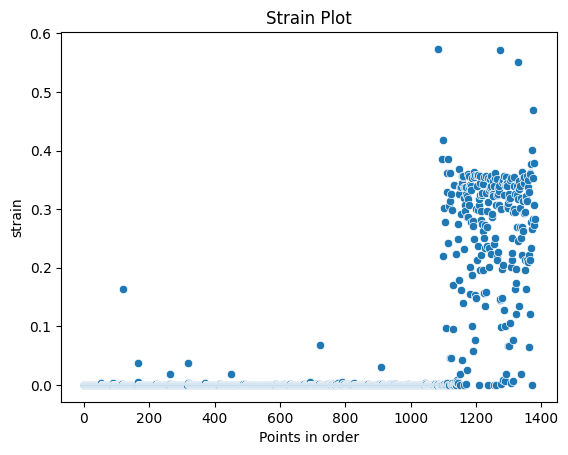

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
strain=df_strain['strain']
sns.scatterplot(strain.values)
plt.title("Strain Plot")
plt.xlabel("Points in order")
plt.ylabel("strain")
plt.show()

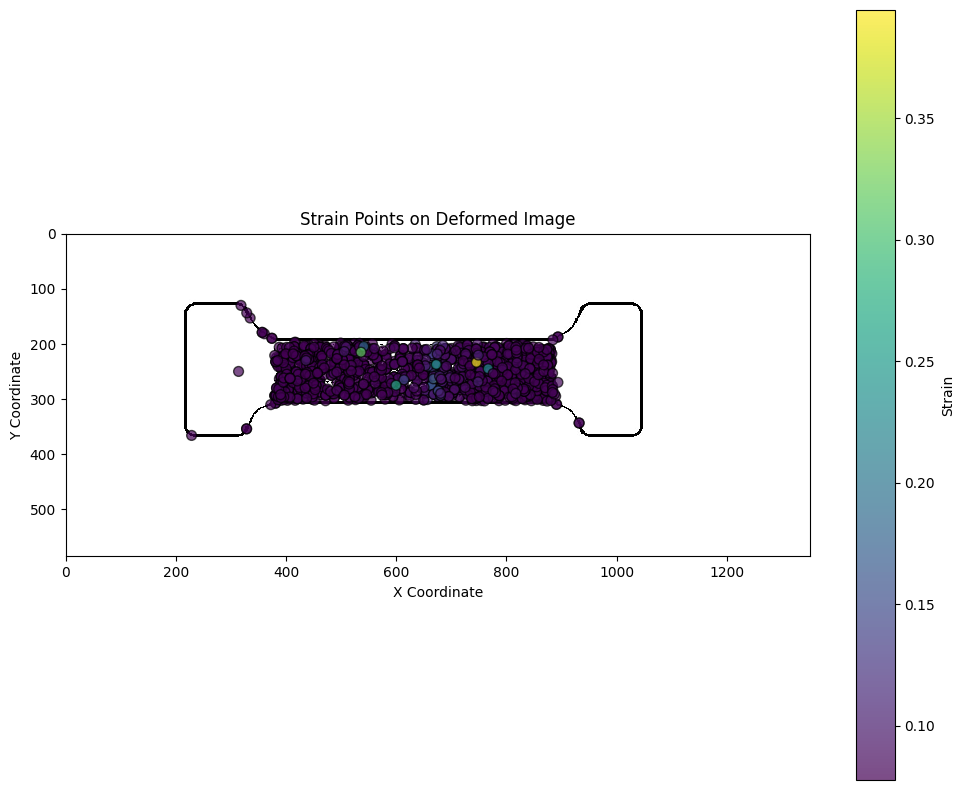

In [7]:
from scipy.interpolate import griddata
import matplotlib.pyplot as plt
import seaborn as sns
x = df_strain['Def_X']
y = df_strain['Def_Y']
values = df_strain['strain']
plt.figure(figsize=(12, 10))
deformed_image_rgb = cv2.cvtColor(deformed_image, cv2.COLOR_BGR2RGB)
plt.imshow(deformed_image_rgb, interpolation='none')
scatter = plt.scatter(x, y, c=values, cmap='viridis', edgecolor='k', s=50, alpha=0.7)

# Add colorbar
plt.colorbar(scatter, label='Strain')

# Set titles and labels
plt.title('Strain Points on Deformed Image')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')

plt.show()

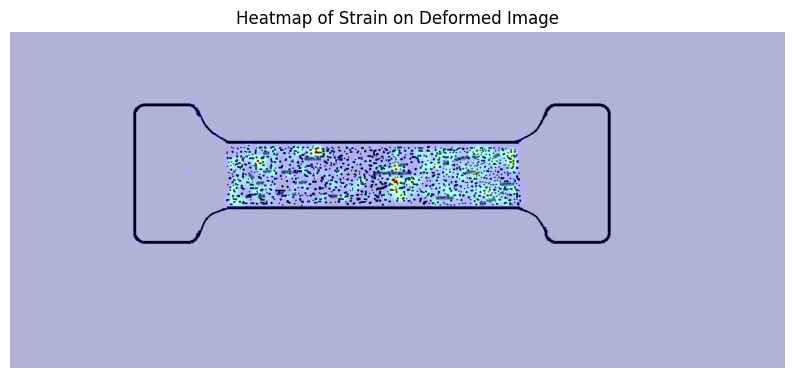

In [8]:
heatmap = np.zeros_like(deformed_gray, dtype=np.float32)

# Fill the heatmap based on strain values
for index, row in df_strain.iterrows():
    x, y = int(row['Def_X']), int(row['Def_Y'])
    strain_value = row['strain']
    heatmap[y, x] = strain_value

heatmap = cv2.GaussianBlur(heatmap, (0, 0), sigmaX=5, sigmaY=5)
heatmap_normalized = cv2.normalize(heatmap, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)
heatmap_colored = cv2.applyColorMap(heatmap_normalized, cv2.COLORMAP_JET)

blended_image = cv2.addWeighted(deformed_image, 0.7, heatmap_colored, 0.3, 0)

plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(blended_image, cv2.COLOR_BGR2RGB))
plt.title('Heatmap of Strain on Deformed Image')
plt.axis('off')
plt.show()

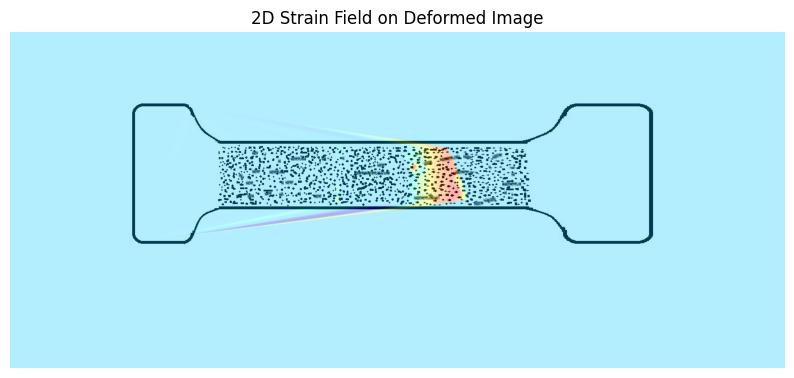

In [62]:
heatmap = np.zeros_like(deformed_gray, dtype=np.float32)

# Prepare coordinates and strain values for interpolation
points = df_strain[['Def_X', 'Def_Y']].values
values = df_strain['strain'].values

# Create a grid for the heatmap
grid_x, grid_y = np.mgrid[0:deformed_gray.shape[1], 0:deformed_gray.shape[0]]

# Interpolate strain values on the grid
grid_z = griddata(points, values, (grid_x, grid_y), method='cubic', fill_value=0)

# Normalize the heatmap
heatmap_normalized = cv2.normalize(grid_z, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)

# Apply a color map to the heatmap
heatmap_colored = cv2.applyColorMap(heatmap_normalized, cv2.COLORMAP_JET)

# Transpose the heatmap to match the shape of deformed_image
heatmap_colored = heatmap_colored.transpose(1, 0, 2) # Added this line to fix the shape mismatch

# Blend the heatmap with the deformed image
blended_image = cv2.addWeighted(deformed_image, 0.7, heatmap_colored, 0.3, 0)

# Display the blended image
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(blended_image, cv2.COLOR_BGR2RGB))
plt.title('2D Strain Field on Deformed Image')
plt.axis('off')
plt.show()

In [9]:
import math

# Find the row with the maximum strain
max_strain = df_strain.loc[df_strain['strain'].idxmax()]

# Filter the dataframe based on the maximum strain's coordinates
max_line = df_filtered[
    (df_filtered['Ref_X'] >= math.floor(max_strain['Ref_X'])) &
    (df_filtered['Ref_X'] <= math.ceil(max_strain['Ref_X']))]
print(math.floor(max_strain['Ref_X']), math.ceil(max_strain['Ref_X']))
print(max_line.head())

print("Average strain: ",max_line['strain'].mean())

759 760
           Ref_X       Ref_Y       Def_X       Def_Y   distance  \
1334  759.740051  269.750793  805.570984  269.750763  45.830933   
1357  759.544373  296.231689  805.298462  296.246155  45.754092   
1616  759.876770  257.747162  745.468933  233.030075  28.609791   

      total_distance  distance_def  displacement    strain  
1334      126.244751    136.618713     10.373962  0.082173  
1357      126.049072    136.346191     10.297119  0.081691  
1616      126.381470     76.516663     49.864807  0.394558  
Average strain:  0.18614088882190216


In [11]:
import math

# Find the row with the minimum strain
min_strain = df_strain.loc[df_strain['strain'].idxmin()]

# Filter the dataframe based on the minimum strain's coordinates
min_line = df_filtered[
    (df_filtered['Ref_X'] >= math.floor(min_strain['Ref_X'])) &
    (df_filtered['Ref_X'] <= math.ceil(min_strain['Ref_X']))]
print(math.floor(min_strain['Ref_X']), math.ceil(min_strain['Ref_X']))
print(min_line)

print("Average strain: ",min_line['strain'].mean())

550 551
          Ref_X       Ref_Y       Def_X       Def_Y   distance  \
175  550.611694  300.151306  579.549622  300.064941  28.938056   
463  550.642090  292.101807  579.661072  292.104614  29.018982   
872  550.642090  292.101807  579.661072  292.104614  29.018982   

     total_distance  distance_def  displacement    strain  
175       82.883606     89.402649      6.519043  0.078653  
463       82.853210     89.291199      6.437988  0.077704  
872       82.853210     89.291199      6.437988  0.077704  
Average strain:  0.07802002573267082


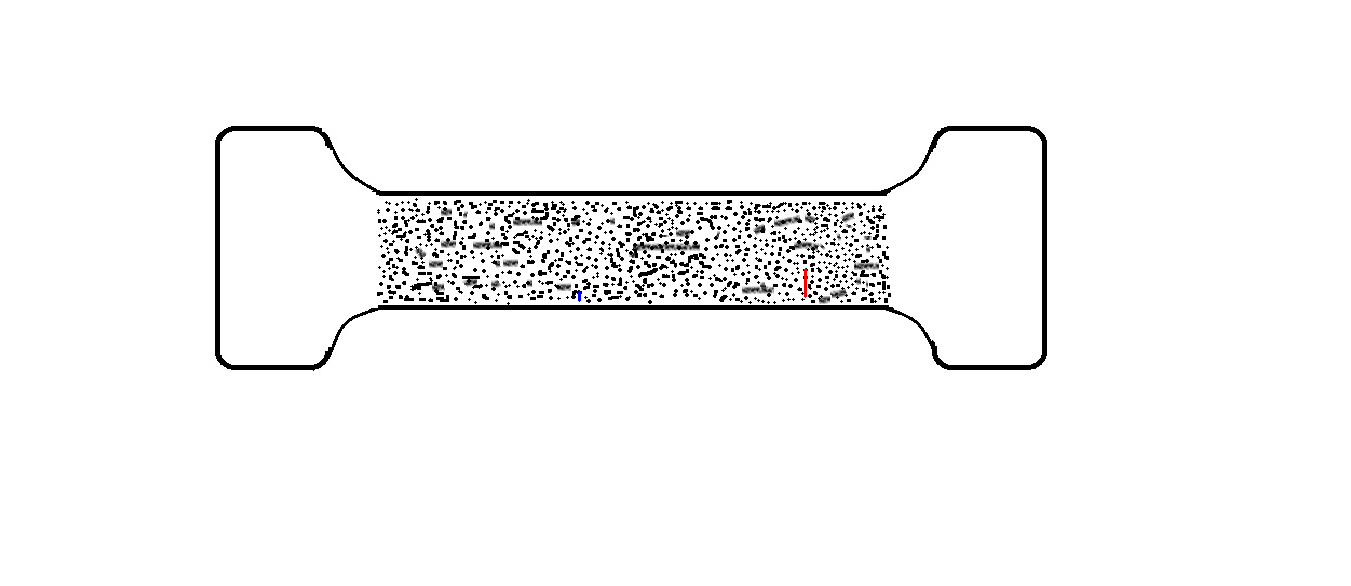

In [14]:
import cv2
from google.colab.patches import cv2_imshow

start_point = [int(579.661072), int(292.104614)]  # Convert coordinates to integers
end_point = [int(579.549622), int(300.064941)]  # Convert coordinates to integers
cv2.line(deformed_image, start_point, end_point, (255, 0, 0), 2)
cv2_imshow(deformed_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

Code to Convert Video to Images

In [ ]:
import cv2
import os

# Define the video path and the output directory
video_path = '/content/WIN_20240809_14_37_26_Pro.mp4'
output_dir = '/content/images'

# Create the output directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Open the video file
cap = cv2.VideoCapture(video_path)

# Get the frames per second (FPS) of the video
fps = cap.get(cv2.CAP_PROP_FPS)
print(f"Frames per second (FPS): {fps}")
frame_interval = int(fps)  # Number of frames to skip to get 1 frame per second

frame_count = 0
image_count = 0

while True:
    ret, frame = cap.read()

    if not ret:
        break

    # Save one frame per second
    if frame_count % frame_interval == 0:
        image_name = os.path.join(output_dir, f'image_{image_count:04d}.jpg')
        cv2.imwrite(image_name, frame)
        image_count += 1

    frame_count += 1

# Release the video capture object
cap.release()
cv2.destroyAllWindows()

print(f"Extracted {image_count} images from the video.")


Frames per second (FPS): 29.986263276041143
Extracted 7 images from the video.
